In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter
import re

In [2]:
run_path = '../'
test_name = 'Wave_400'
test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
analyser = RunAnalyser(runs, test_path)

<Figure size 700x700 with 0 Axes>

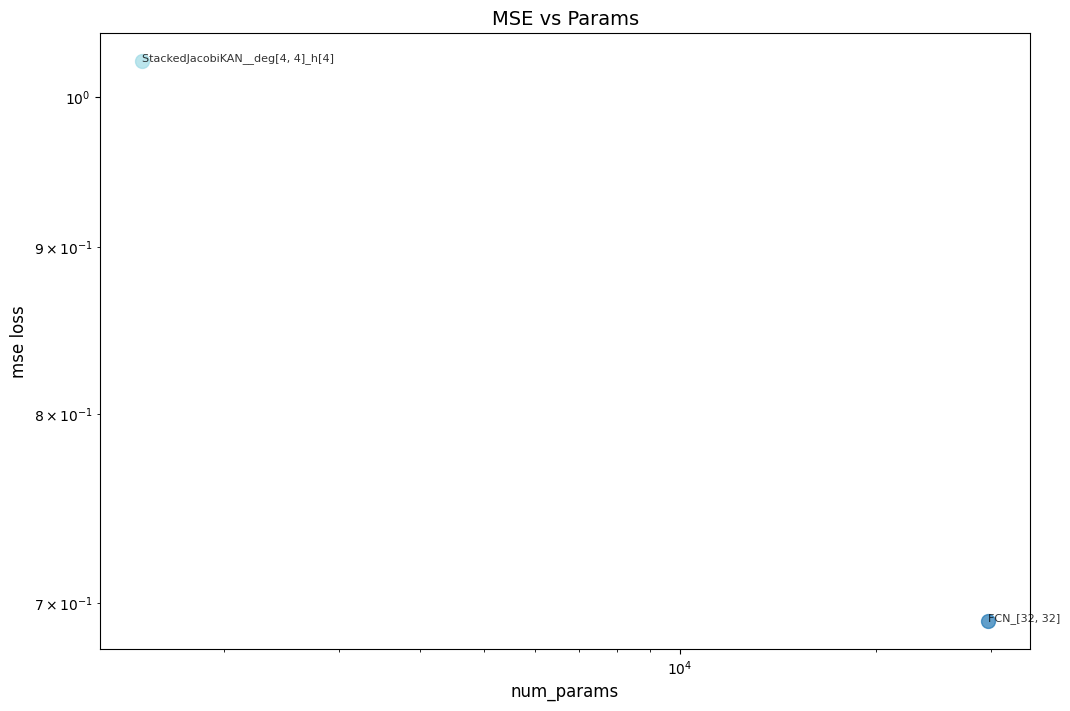

In [4]:
analyser.plot_mse_over_params()

<Figure size 700x700 with 0 Axes>

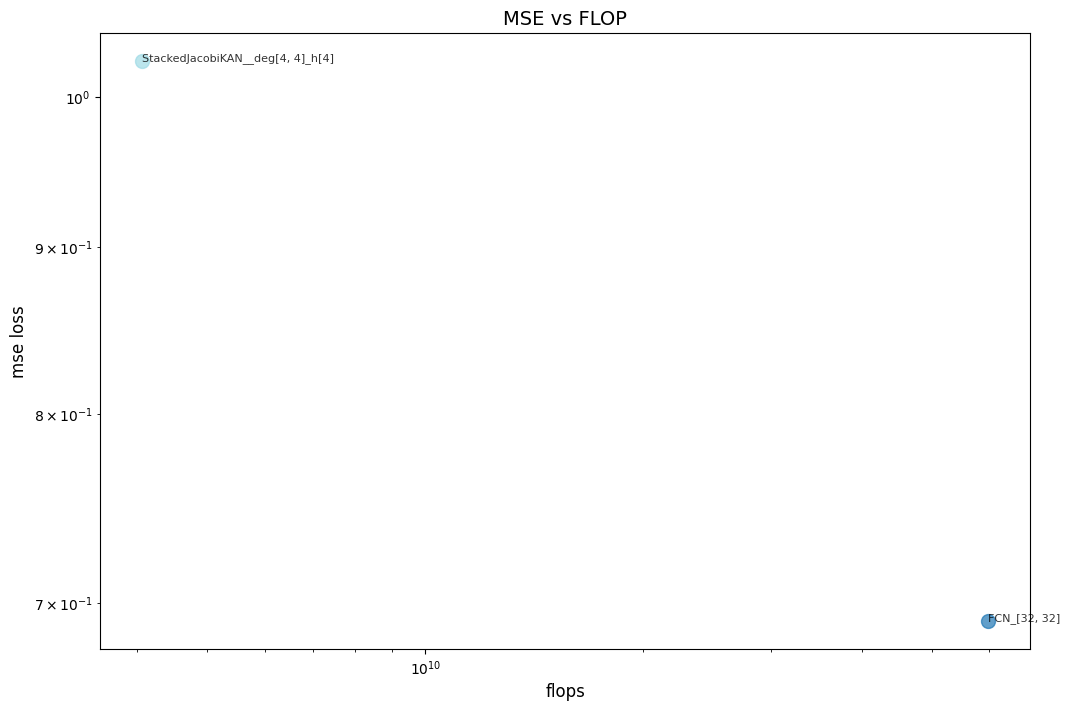

In [5]:
analyser.plot_mse_over_flops()

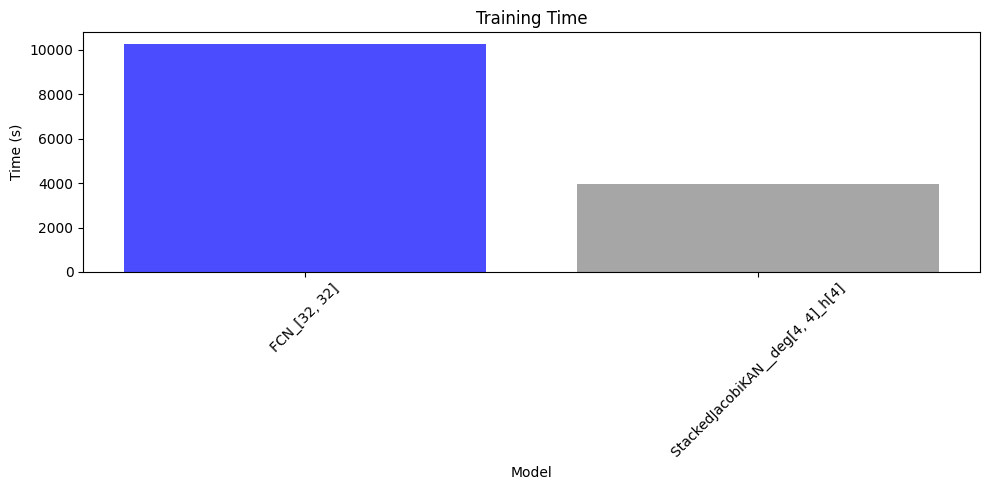

In [6]:
analyser.plot_training_times(filter=lambda x: 'Stacked' in x or 'FCN' in x)

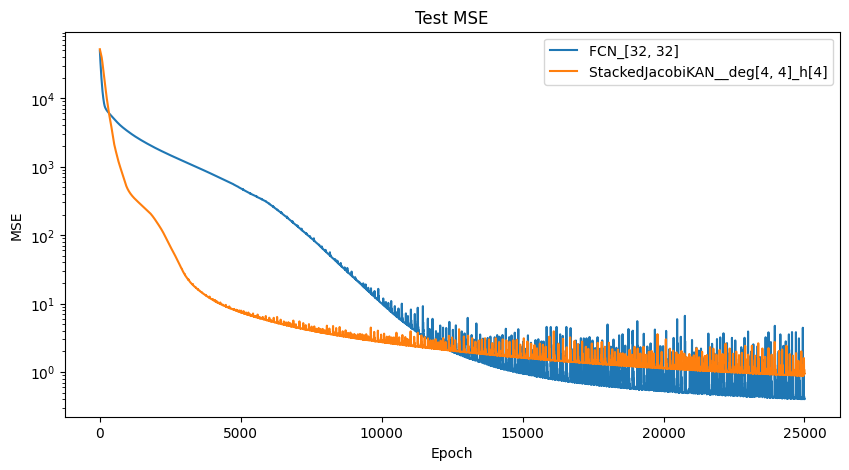

In [7]:
analyser.plot_mses()

In [8]:
from collections import defaultdict

In [ ]:
rae = lambda exact, pred: (np.abs(exact - pred) / (np.abs(exact)))

decomps = ['50', '100', '200', '400']

mses = defaultdict(list)
for n, d in enumerate(decomps):
    test_name = f'Wave_{d}'
    test_path = os.path.join(run_path, test_name)
    runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
    analyser = RunAnalyser(runs, test_path)
    m = analyser.get_mses()
    for k, v in m.items():
        mses[k].append((d, v))

In [10]:
mses

defaultdict(list,
            {'FCN_[32, 32]': [('50',
               array([4.86373672e+04, 4.75431758e+04, 4.65005625e+04, ...,
                      1.27698839e+00, 1.22337961e+00, 1.24356508e+00])),
              ('100',
               array([4.91467969e+04, 4.80457227e+04, 4.69959688e+04, ...,
                      6.80147648e-01, 6.97306514e-01, 7.10328579e-01])),
              ('200',
               array([4.94009180e+04, 4.82964805e+04, 4.72432227e+04, ...,
                      3.56685966e-01, 3.59275132e-01, 3.63157213e-01])),
              ('400',
               array([4.95278398e+04, 4.84217344e+04, 4.73667383e+04, ...,
                      4.09274191e-01, 4.05925483e-01, 4.05323714e-01]))],
             'StackedJacobiKAN__deg[4, 4]_h[4]': [('50',
               array([5.11348711e+04, 5.09277500e+04, 5.07235078e+04, ...,
                      8.03801358e-01, 8.02464604e-01, 7.99815059e-01])),
              ('100',
               array([5.16125469e+04, 5.14048516e+04, 5.119

50
50
50
50
[('n=2500', 0.0), ('n=10000', -0.6342979099456307), ('n=40000', -0.7240319690133569), ('n=160000', -0.6904840114009168)]
50
50
50
50
[('n=2500', 0.0), ('n=10000', 0.07714168928640884), ('n=40000', 0.06585729081520697), ('n=160000', 0.0829523641241287)]


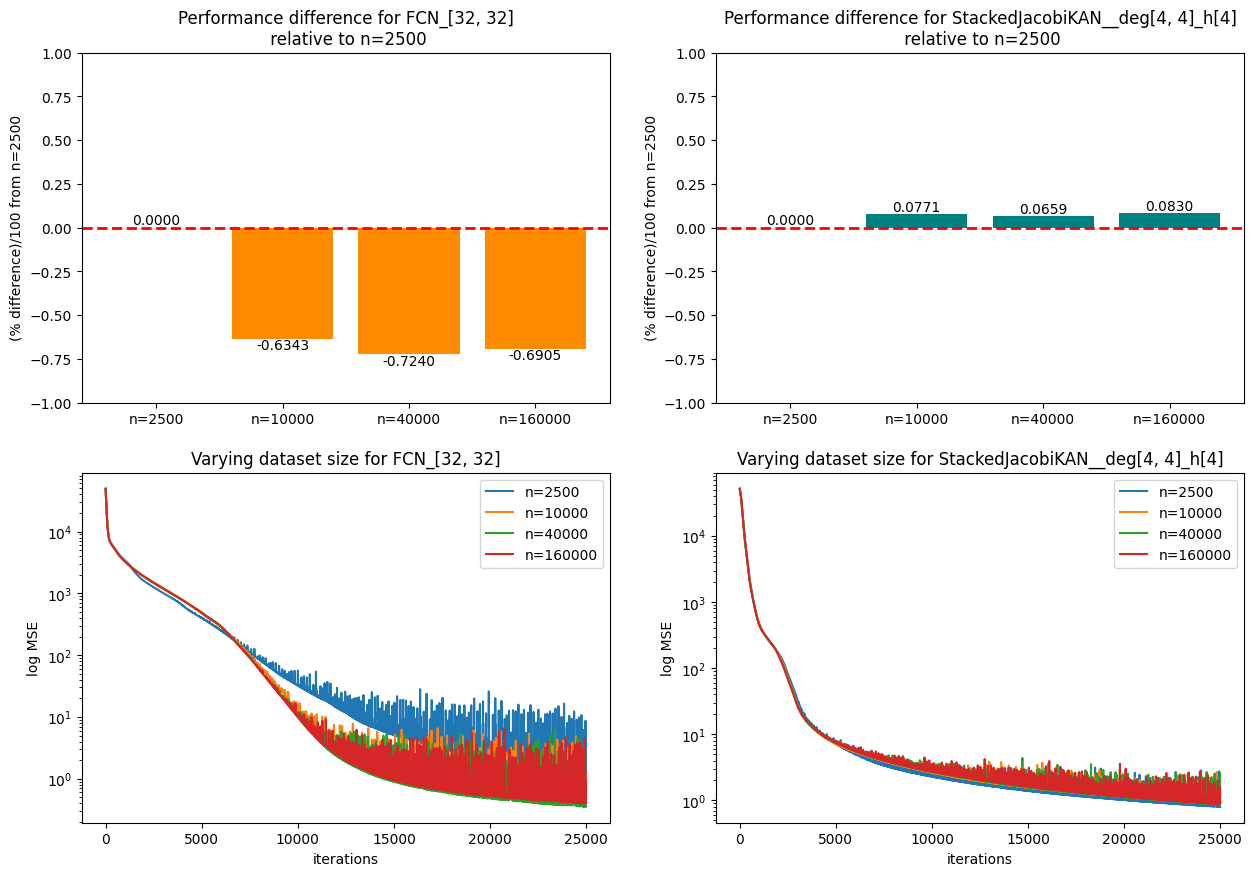

In [27]:
plt.figure(figsize=(15, 10))
cs = {
    'FCN_[32, 32]': 'darkorange',
    'StackedJacobiKAN__deg[4, 4]_h[4]': 'teal'
}
z = 23000
for n, (k, v) in enumerate(mses.items()):
    
    ns_bar = []
    ys_bar = []
    for nn, ms in v:
        ns_bar.append(f'n={int(nn)**2}')
        ys_bar.append((np.mean(ms[z:]) - np.mean(mses[k][0][1][z:])) / np.mean(mses[k][0][1][z:]))
        print(mses[k][0][0])
    print(list(zip(ns_bar, ys_bar)))

    ax = plt.subplot(2, 2, n+1)
    bars = plt.bar(ns_bar, ys_bar, color=cs[k])
    plt.ylim((-1, 1))
    ax.bar_label(bars, fmt='%.4f')
    plt.ylabel('(% difference)/100 from n=2500')
    plt.title(f'Performance difference for {k}\n relative to n=2500')

    plt.axhline(y=0,linewidth=2, color='red', ls='--')

    plt.subplot(2, 2, n+1+2)
    for n, ms in v:
        plt.plot(ms, label=f"n={int(n)**2}")
    plt.legend()
    plt.title(f'Varying dataset size for {k}')
    plt.yscale('log')
    plt.ylabel('log MSE')
    plt.xlabel('iterations')

plt.show()

In [14]:
times = defaultdict(list)
for n, d in enumerate(decomps):
    test_name = f'Wave_{d}'
    test_path = os.path.join(run_path, test_name)
    runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
    analyser = RunAnalyser(runs, test_path)
    t = analyser.get_training_time()
    for k, v in t.items():
        times[k].append((n, v))
times

defaultdict(list,
            {'FCN_[32, 32]': [(0, 198.99851179122925),
              (1, 689.4036796092987),
              (2, 2639.9780440330505),
              (3, 10265.598037481308)],
             'StackedJacobiKAN__deg[4, 4]_h[4]': [(0, 103.96739840507507),
              (1, 318.99218797683716),
              (2, 1159.32532787323),
              (3, 3954.4348950386047)]})

In [19]:
ts = defaultdict()
for k, v in times.items():
    a = [0, 0, 0, 0]
    for i in range(1, len(v)):
        a[i] = (v[i][1] - v[0][1])/v[0][1]
    ts[k] = a
ts

defaultdict(None,
            {'FCN_[32, 32]': [0,
              2.464366006578768,
              12.266320538128799,
              50.58630557122467],
             'StackedJacobiKAN__deg[4, 4]_h[4]': [0,
              2.0681943846857465,
              10.150854456858648,
              37.03533565042609]})

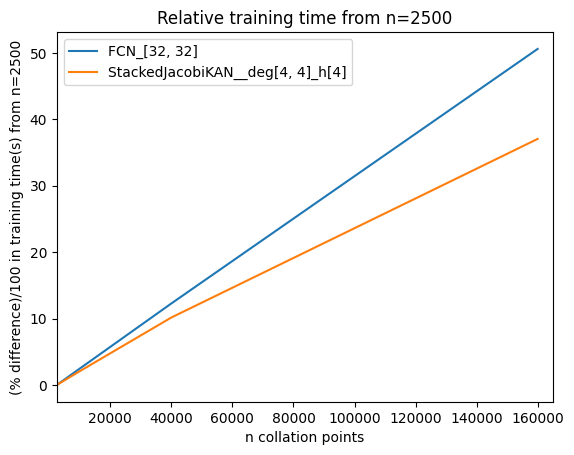

In [32]:
for k, v in ts.items():
    plt.plot([2500, 10000, 40000, 160000], v, label=k)
plt.legend()
plt.title('Relative training time from n=2500')
plt.ylabel('(% difference)/100 in training time(s) from n=2500')
plt.xlim((2500, 165000))
plt.xlabel('n collation points')
plt.show()